# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

scikit-learn version:  0.21.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1231682 #PLACE YOUR ID
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)



Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [67 68 52 70 46 61 67 61 57 51]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


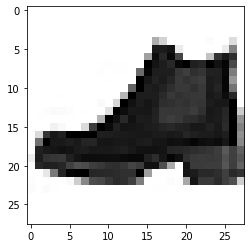

LABEL: 9
INPUT:


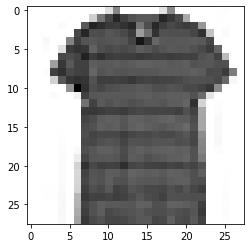

LABEL: 0
INPUT:


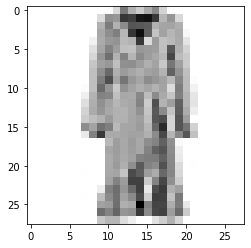

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,),(50,), (40,20,), (50,100,),(40,60,), (40,30,20) ]}

mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu', max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#Result obtains from default values
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print('Classification report:\n', classification_report(y_test, y_pred))
print('\n Confusion matrix:\n',confusion_matrix(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      5933
           1       0.94      0.95      0.95      5932
           2       0.65      0.72      0.68      5948
           3       0.84      0.80      0.82      5930
           4       0.73      0.55      0.63      5954
           5       0.93      0.82      0.87      5939
           6       0.51      0.61      0.56      5933
           7       0.85      0.89      0.87      5939
           8       0.90      0.90      0.90      5943
           9       0.87      0.93      0.90      5949

    accuracy                           0.79     59400
   macro avg       0.80      0.79      0.79     59400
weighted avg       0.80      0.79      0.79     59400


 Confusion matrix:
 [[4494   64   97  236   32    5  881   10  113    1]
 [  27 5654   36  169   15    1   19    1    9    1]
 [  80   31 4286   29  604    9  814    1   91    3]
 [ 293  150  139 4744  177    1  384 

In [9]:
clf = GridSearchCV(param_grid = parameters, estimator = mlp, cv = 5)
clf.fit(X_train, y_train)


print ('RESULTS FOR NN\n')
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()

print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)


print("All scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('Score of parameter for', params, 'is=', mean, '+-', std *2)
     

C:\Users\delir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      5933
           1       0.92      0.96      0.94      5932
           2       0.65      0.63      0.64      5948
           3       0.88      0.72      0.79      5930
           4       0.65      0.73      0.69      5954
           5       0.91      0.84      0.87      5939
           6       0.53      0.51      0.52      5933
           7       0.85      0.91      0.88      5939
           8       0.93      0.91      0.92      5943
           9       0.90      0.91      0.90      5949

    accuracy                           0.79     59400
   macro avg       0.80      0.79      0.79     59400
weighted avg       0.80      0.79      0.79     59400


Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 60), l

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
hidden_layer = clf.best_params_
print(hidden_layer)

{'hidden_layer_sizes': (40, 60)}


In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf.best_estimator_, X_train, y_train, cv = 5)

array([0.73809524, 0.73770492, 0.83050847, 0.8034188 , 0.73504274])

In [12]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1,  4, 12, 16, 22, 32, 40, 56, 64, 100, 480]}

kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(hidden_layer_sizes=(40, 60), activation='relu', max_iter=300, alpha=1e-4, 
                    solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)
clf = GridSearchCV(param_grid = parameters, estimator = mlp, cv = kf)
clf.fit(X_train, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)


print("All scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('Score of parameter for', params, 'is=', mean, '+-', std *2)
     

Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 60), learning_rate='constant',
              learning_rate_init=0.1, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1231682, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Best parameters set found:
{'batch_size': 100}
Score with best parameters:
0.755
All scores on the grid:
Score of parameter for {'batch_size': 1} is= 0.1 +- 0.056764621219754674
Score of parameter for {'batch_size': 4} is= 0.11166666666666666 +- 0.029059326290271158
Score of parameter for {'batch_size': 12} is= 0.24666666666666667 +- 0.19223827807061622
Score of parameter for {'batch_size': 16} is= 0.30333333333333334 +- 0.23060307408570635
Score of parameter for

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

It can be seen that for different architectures changing the number of neurons does not change too much the performance. However, the performance is small in the lowest (10) and the biggest parameter (40, 30, 20). The best architecture found is the one with a two-layer with (40, 60) neurons. 

For different batches size it can be seen that for small parameters the accuracy is too small, that's because using small batches make the procedure very unstable. On the other hand, it can be seen that when is reach a certain threshold the accuracy remains similar.


### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

In [13]:
import matplotlib.pyplot as plt

lr_list = [10**exp for exp in range(-3,0)]
scores = {'learning_rate_init': lr_list}

kf = sklearn.model_selection.KFold(n_splits=5)
mlp = MLPClassifier(hidden_layer_sizes=(40, 60), activation='relu', max_iter=300, batch_size = 100, alpha=1e-4, 
                    solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=scores)

clf = GridSearchCV(param_grid = scores, estimator = mlp, cv = kf)    
clf.fit(X_train, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)




C:\Users\delir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\delir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\delir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\delir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best estimator found by grid search:
MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 60), learning_rate='constant',
              learning_rate_init=0.01, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1231682, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Best parameters set found:
{'learning_rate_init': 0.01}
Score with best parameters:
0.7616666666666667


C:\Users\delir\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


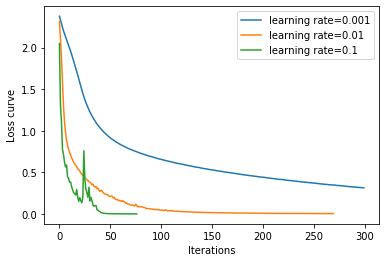

In [14]:
for lr in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes=(40,60), max_iter=300, batch_size = 100, 
                    solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=lr)

    mlp.fit(X_train, y_train)
    plt.plot(mlp.loss_curve_, label="learning rate="+str(lr))
    plt.ylabel("Loss curve")
    plt.xlabel("Iterations")


plt.legend()
plt.show()

#with large learning rate it does not converge (its really bad and you can see that is unstable)

### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 2]

It can be seen that for a slow learning rate the curve is more stable but it takes more iterations to converge. A smooth curve is shown for 0.001 but it doesn't reach convergences in the 300 iterations. On the other hand, for 0.01 it can also be seen a smooth curve (with little peaks) but it reaches convergence before the 300 iterations.

Increasing the learning rate leads to less iteration to converge (∼70 it), hence it reaches stability faster but the curve oscillates too much


### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.

Best NN training error: 0.000000
Best NN test error: 0.217340


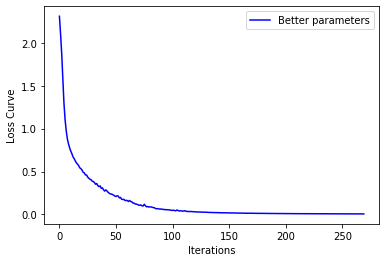

In [15]:
#get training and test error for the best NN model from CV
#change values according to the best one

#TO DO
best_mlp = MLPClassifier(hidden_layer_sizes=(40,60), activation='relu', max_iter=300, batch_size = 100,  
                    solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.01)

best_mlp.fit(X_train, y_train)



training_error = 1. - best_mlp.score(X_train,y_train)
print ("Best NN training error: %f" % training_error)

test_error = 1. - best_mlp.score(X_test,y_test)
print ("Best NN test error: %f" % test_error)
                         
plt.plot(best_mlp.loss_curve_, 'b-', label="Better parameters")
plt.ylabel("Loss Curve")
plt.xlabel("Iterations")
plt.legend()
plt.show()

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [16]:
X_big = X[permutation]
y_big = y[permutation]

m_training = 5000

X_train_big, X_test_big = X_big[:m_training], X_big[m_training:]
y_train_big, y_test_big = y_big[:m_training], y_big[m_training:]

labels, freqs = np.unique(y_train_big, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [514 516 516 505 494 486 485 497 468 519]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [17]:
# use best architecture and params from before

mlp_large = MLPClassifier(hidden_layer_sizes=(40,60), activation='relu', max_iter=300, batch_size = 100, alpha=1e-4, 
                         solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=0.01)
    
mlp_large.fit(X_train_big,y_train_big)




print ('\nRESULTS FOR NN\n')
training_error = 1. - mlp_large.score(X_train_big,y_train_big)
print ("NN training error: %f" % training_error)

test_error = 1. - mlp_large.score(X_test_big,y_test_big)
print ("NN test error: %f" % test_error)






RESULTS FOR NN

NN training error: 0.000000
NN test error: 0.167364


## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## [ANSWER TO QUESTION 3]

m = 600
Best NN training error: 0.000000
Best NN test error: 0.217340

m = 5000
NN training error: 0.000000
NN test error: 0.167364

It can be seen that the training error remains too small for both of the cases. On the other hand, one can notice that increasing the dataset allows having better test error as we expect. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

In [18]:
NN_prediction = best_mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test_big)


missclassified = []
for i in range(m_training):
    if (NN_prediction[i] != y[i]) and (large_NN_prediction[i] == y[i]):
        missclassified.append(i)
        
        

Missclassified sample index: 12
NN_prediction: 1
INPUT:


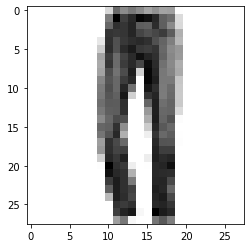

LABEL: 1
large_NN_prediction: 3
INPUT:


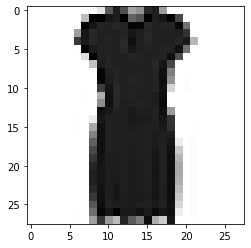

LABEL: 3
Missclassified sample index: 35
NN_prediction: 6
INPUT:


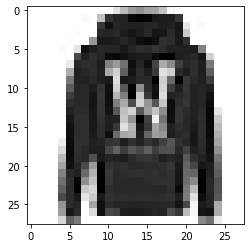

LABEL: 2
large_NN_prediction: 2
INPUT:


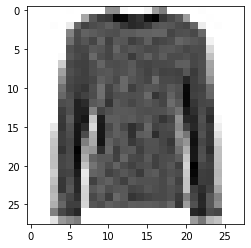

LABEL: 2
Missclassified sample index: 41
NN_prediction: 2
INPUT:


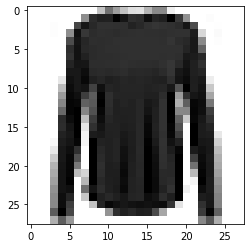

LABEL: 2
large_NN_prediction: 5
INPUT:


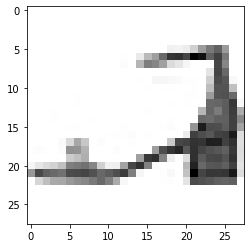

LABEL: 5


In [19]:
for index in missclassified[0:3]:
    print('Missclassified sample index:', index)
    print('NN_prediction:', NN_prediction[index])
    plot_input(X_test,y_test,index)
    print('large_NN_prediction:', large_NN_prediction[index])
    plot_input(X_test_big,y_test_big,index)

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


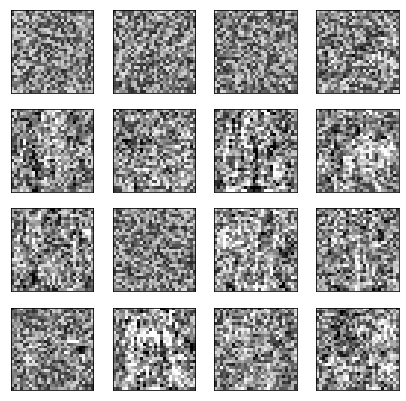

Weights with 5000 data points:


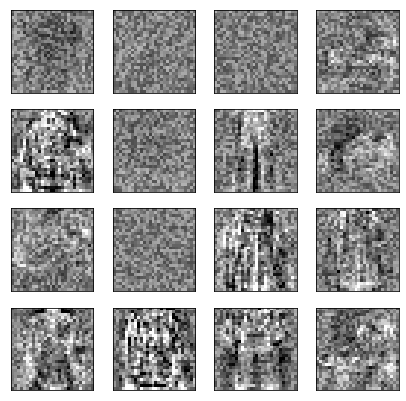

In [20]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4, figsize=(7,7))
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4, figsize=(7,7))
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()


Labels and frequencies in test set:  [5933 5932 5948 5930 5954 5939 5933 5939 5943 5949]


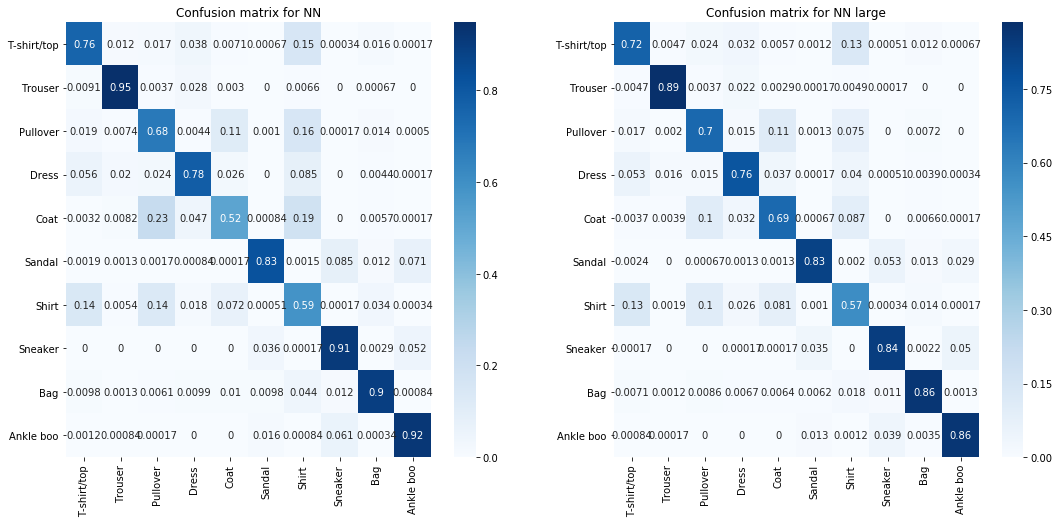

In [21]:
from sklearn.metrics import confusion_matrix
import pandas as pd

import seaborn as sns
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

index = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag', 'Ankle boo']  
columns = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag', 'Ankle boo'] 
NN_prediction = best_mlp.predict(X_test)
confusion_NN = confusion_matrix(y_test, NN_prediction)
cm1 =confusion_NN /counts[:,None]

cm1_df = pd.DataFrame(cm1,columns,index)                      


large_NN_prediction = mlp_large.predict(X_test_big)
confusion_large_NN = confusion_matrix(y_test_big,large_NN_prediction)
cm2 =confusion_large_NN /counts[:,None]

cm2_df = pd.DataFrame(cm2,columns,index)                      


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,8))
ax1.set_title('Confusion matrix for NN')
ax2.set_title('Confusion matrix for NN large')
sns.heatmap(cm1_df, annot=True, cmap=plt.cm.Blues, ax=ax1)
sns.heatmap(cm2_df, annot=True, cmap=plt.cm.Blues, ax=ax2)


## QUESTION 4

Describe what do you observe by looking at the weights

This coefficient represents the connection between the layers. It can be seen that for most of the parameters the weight becomes less clear for the training set to large. This can also be seen in the confusion matrix, most of the values are better for m smaller. The only variable that gets better performance when m is larger is the coat that can be (a little) distinguish in the second row and third column of the large training set weights. 



### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [22]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

svc = SVC(kernel = 'rbf', C=5, gamma=0.005)

svc.fit(X_train, y_train)

best_SVM = GridSearchCV(estimator = svc, param_grid = parameters, cv = 4)
best_SVM.fit(X_train, y_train)
#ADD YOUR CODE

print ('RESULTS FOR SVM')

SVM_training_error = 1. - best_SVM.score(X_train,y_train)#ADD YOUR CODE

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error =  1. - best_SVM.score(X_test,y_test)#ADD YOUR CODE
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0038000000000000256
Test score SVM:
0.14880000000000004


## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

## [ANSWER TO QUESTION 5]

RESULTS FOR SVM

Training score SVM:0.07220000000000004

Test score SVM:0.134

RESULTS FOR NN

Best NN training error: 0.000000

Best NN test error: 0.217340

It can be seen that the training error for the Support Vector machine is greater than the Neural Network model. On the other hand, it can be seen that the test error is better for the SVM. 
I would choose the Support vector machine because the training error is (still) really small and I get better performance on the test set.
